## **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [ ]:
# Install jdk8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_342"
OpenJDK Runtime Environment (build 1.8.0_342-8u342-b07-0ubuntu1~18.04-b07)
OpenJDK 64-Bit Server VM (build 25.342-b07, mixed mode)


**Install BigDL Orca**

You can install the latest pre-release version using `pip install --pre --upgrade bigdl-orca`. 

In [ ]:
# Install latest pre-release version of BigDL Orca 
# Installing BigDL Orca from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-orca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 1.6 MB/s 
     |████████████████████████████████| 35.4 MB 144 kB/s 
     |████████████████████████████████| 71.0 MB 618 bytes/s 
     |████████████████████████████████| 53.5 MB 113 kB/s 
     |████████████████████████████████| 48.2 MB 1.6 MB/s 
     |████████████████████████████████| 218.4 MB 59 kB/s 
     |████████████████████████████████| 197 kB 12.6 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=218814407 sha256=a437222d72dd8d8ca597d2e83e44adc2b8195b5f1915488004e2eadce892f3a0
  Stored in directory: /root/.cache/pip/wheels/f1/42/b0/ba397759613f4feb1611021a2503e60e344e546671b2ae04f8
Successfully built pyspark


In [ ]:
# Install required dependencies
!pip install tensorflow==1.15.0 tensorflow-datasets==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 21 kB/s 
     |████████████████████████████████| 3.1 MB 9.9 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 503 kB 56.2 MB/s 
     |████████████████████████████████| 3.8 MB 29.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=4e0f9c07d2f458ed6a939f444f53a1b0a91df6bb6680eecb62190ae1320ac7e0
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      S

In [ ]:
pip install 'h5py==2.10.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 2.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
pip install keras-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 2.1 MB/s 


In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install keras==2.1.6
!pip install tensorflow==1.15.0
!pip install tensorflow-datasets==3.2.1
!pip install h5py==2.10.0

Found existing installation: keras-nightly 2.11.0.dev2022092007
Uninstalling keras-nightly-2.11.0.dev2022092007:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.11.0.dev2022092007.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/api/_v1/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/api/keras/mixed_precision/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/combinations.py
    /usr/local/lib/python3.7/dist-packages/keras/keras_parameterized.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/advanced_activations.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/convolutional.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/convolutional_recurrent.py
   

### Imports

In [ ]:
import argparse
import matplotlib.pyplot as plt
from tensorflow import keras
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca.learn.tf.estimator import Estimator
from bigdl.orca import OrcaContext
import tensorflow as tf
import tensorflow_datasets as tfds
import datetime
import time
from bigdl.orca.learn.tf.estimator import Estimator
from tabulate import tabulate
OrcaContext.log_output = False
# OrcaContext.log_output = True # recommended to set it to True when running BigDL in Jupyter notebook (this will display terminal's  stdout and stderr in the Jupyter notebook).

## Utils

In [ ]:
def train_test(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=1, cluster_mode="local", num_nodes=2, cores=2):
    init_orca_context(cluster_mode=cluster_mode, num_modes=min(3, num_nodes), cores=min(4, cores))
    if not model:
        model = keras.Sequential(
        [keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             input_shape=(28, 28, 1), padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                             padding='valid'),
         keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         keras.layers.Flatten(),
         keras.layers.Dense(500, activation='tanh'),
         keras.layers.Dense(10, activation='softmax'),
         ]
        )

        model.compile(optimizer=keras.optimizers.RMSprop(),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
    if not (train_data or test_data):
        if not preprocess:
            def preprocess(data):
              data['image'] = tf.cast(data["image"], tf.float32) / 255.
              return data['image'], data['label']

        # get DataSet
        train_data = tfds.load(name="mnist", split="train", data_dir="gs://tfds-data/datasets")
        test_data = tfds.load(name="mnist", split="test", data_dir="gs://tfds-data/datasets")

        train_data = train_data.map(preprocess)
        test_data = test_data.map(preprocess)
    
    # Disable AutoShard.
    options = tf.data.Options()
    options.experimental_distribute.auto_shard = False
    train_data = train_data.with_options(options)
    test_data = test_data.with_options(options)
    
    est = Estimator.from_keras(keras_model=model)
    #This will come as an argument for the Function
    #validation_data will be given as an argument in the Function
    tic = time.time()
    est.fit(
        data=train_data,
        batch_size=320,
        epochs=epochs,
        validation_data=test_data
    )
    tac = time.time()
    fit_time = tac-tic
    # evaluate and print result
    # result = est.evaluate(test_data)
    # print(result)
    output_name = "/tmp/" + (f"{output_model_name+str(datetime.datetime.now()) if output_model_name else str(datetime.datetime.now())}.h5")
    output_name = output_name.replace(" ", "_")
    if save_model:
        est.save_keras_model(output_name)
    # return output_name, fit_time, est
    return output_name, fit_time

def save_output(output_model_name, time, result_estimator):
    print(f"Saving output to: {output_model_name}")
    
def visualize_output(output_model_name):
    print(f"Visualizing from: {output_model_name}")

def train_test_save(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=10, cluster_mode="local", num_nodes=2, cores=2):
    output_model_name, fit_time = train_test(
        model=model,
        train_data=train_data,
        test_data=test_data,
        preprocess=preprocess,
        output_model_name=output_model_name,
        epochs=epochs,
        cluster_mode=cluster_mode,
        num_nodes=num_nodes,
        cores=cores,
        save_model=save_model
    )
    print(f"---->>> {output_model_name}, {num_nodes} nodes, {cores} cores, fitted after {fit_time}sec")
    save_output(output_model_name, time, None)
    visualize_output(output_model_name)
    return output_model_name, fit_time

def grid_search(model=None, train_data=None, test_data=None, preprocess=None, output_model_name=None, save_model=False, epochs=10, cluster_mode="local", min_num_nodes=2, max_num_nodes=3, min_cores=1, max_cores=4):
    results = []
    assert min_num_nodes<=max_num_nodes
    assert min_cores<=max_cores
    for num_nodes in range(min_num_nodes, max_num_nodes):
        for cores in range(min_cores, max_cores):
            model_name, fit_time = train_test_save(
                model=model,
                train_data=train_data,
                test_data=test_data,
                preprocess=preprocess,
                output_model_name=output_model_name,
                epochs=epochs,
                cluster_mode=cluster_mode,
                num_nodes=num_nodes,
                cores=cores,
                save_model=save_model
            )
            results.append((model_name, num_nodes, cores, fit_time))
    return results

def visualize_grid_search(model_name, epochs, results):
    xs, ys = [], []
    for datum in results:
        name, nodes, cores, fit_time = datum
        xs.append(f"{nodes}, {cores}")
        ys.append(fit_time/1000)
        plt.bar(xs, ys)
    items = zip(xs, ys)
    print(items)
    print(xs, ys)
    print(tabulate(items, tablefmt="github"))
    plt.title(f"{model_name}: {epochs} epochs")
    plt.xlabel("Nodes, Cores")
    plt.ylabel("Train time (*10^3 sec)")
    plt.plot()

def tabulate_grid_search(model_name, epochs, results):
    xs, ys = [], []
    for datum in results:
        name, nodes, cores, fit_time = datum
        xs.append(f"{nodes}, {cores}")
        ys.append(fit_time)
    items = zip(xs, ys)
    print(model_name)
    print(tabulate(items, tablefmt="github", headers=["Nodes, Cores", "fit_time (sec)"]))

### Datasets

In [ ]:
## MNIST
def preprocess(data):
    data['image'] = tf.cast(data["image"], tf.float32) / 255.
    data['image'] = tf.image.resize(data["image"], (72, 72))
    data['image'] = tf.image.grayscale_to_rgb(data["image"])
    return data['image'], data['label']

# get DataSet
train_data_mnist = tfds.load(name="mnist", split="train", data_dir="gs://tfds-data/datasets")
test_data_mnist = tfds.load(name="mnist", split="test",  data_dir="gs://tfds-data/datasets")

train_data_mnist = train_data_mnist.map(preprocess)
test_data_mnist = test_data_mnist.map(preprocess)

In [ ]:
train_data_mnist

<MapDataset shapes: ((72, 72, 3), ()), types: (tf.float32, tf.int64)>

In [ ]:
## Camelyon
def preprocess_camelyon(data):
    data['image'] = tf.cast(data["image"], tf.float32) / 255.
    """data['image'] = tf.image.resize(data["image"], (72, 72))
    data['image'] = tf.image.grayscale_to_rgb(data["image"])"""
    return data['image'], data['label']

train_data = tfds.load(name="patch_camelyon", split="train",  data_dir="gs://mybucket-bigdl-ece-ntua")
test_data = tfds.load(name="patch_camelyon", split="test",  data_dir="gs://mybucket-bigdl-ece-ntua")

train_data = train_data.map(preprocess_camelyon)
test_data = test_data.map(preprocess_camelyon)


In [ ]:
train_data

<MapDataset shapes: ((96, 96, 3), ()), types: (tf.float32, tf.int64)>

## Fine-tuning utils

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import Xception, MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, GlobalAveragePooling1D, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

def init_train_model(base_model_object=MobileNetV2, name="MobileNetV2", min_num_nodes=1, max_num_nodes=2, min_cores=2, max_cores=3, epochs=1, train_data=train_data_mnist, test_data=test_data_mnist):
    # create the base pre-trained model
    base_model = base_model_object(weights='imagenet', include_top=False)
    # model = Xception(weights='imagenet', include_top=False, input_shape=(28, 28, 3))

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(10, activation='softmax')(x)
    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional layers
    for layer in base_model.layers:
        layer.trainable = False
    # compile the model (should be done *after* setting layers to non-trainable)
    # model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
    model.compile(optimizer=RMSprop(), loss='categorical_crossentropy')

    results_init = grid_search(
        model=model,
        train_data=train_data,
        test_data=test_data,
        min_num_nodes=min_num_nodes,
        max_num_nodes=max_num_nodes,
        min_cores=min_cores,
        max_cores=max_cores,
        epochs=epochs,
        output_model_name=name
    )
    return base_model, model, results_init

def fine_tune(base_model, model, frozen_layers_index, train_data=train_data_mnist, test_data=test_data_mnist, min_num_nodes=2, max_num_nodes=4, min_cores=4, max_cores=5, epochs=2, output_model_name="MobileNetV2-fine"):
    # at this point, the top layers are well trained and we can start fine-tuning convolutional layers
    # convolutional layers We will freeze the bottom N layers and train the remaining top layers

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
    for i, layer in enumerate(base_model.layers):
       print(i, layer.name)

    # freeze the first (n) layers and unfreeze the rest
    for layer in model.layers[:frozen_layers_index]:
       layer.trainable = False
    for layer in model.layers[frozen_layers_index:]:
       layer.trainable = True

    # we need to recompile the model for these modifications to take effect
    # we use SGD with a low learning rate
    model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

    results_fine_tuning = grid_search(
        model=model,
        train_data=train_data,
        test_data=test_data,
        min_num_nodes=min_num_nodes,
        max_num_nodes=max_num_nodes,
        min_cores=min_cores,
        max_cores=max_cores,
        epochs=epochs,
        output_model_name=output_model_name
    )
    
    return results_fine_tuning

## Fine-tuning for 1 epoch

In [ ]:
name = "MobileNetV2"
base_model_object = MobileNetV2

init_epochs = 1
init_min_num_nodes = 1
init_max_num_nodes = 2
init_min_cores = 1
init_max_cores = 5

fine_tuning_epochs = 1
fine_tuning_min_num_nodes = 1
fine_tuning_max_num_nodes = 2
fine_tuning_min_cores = 1
fine_tuning_max_cores = 5
frozen_layers_index = 133

current_training_data = train_data_mnist
current_test_data = test_data_mnist

base_model, model, results_init = init_train_model(
    base_model_object=base_model_object,
    name=name,
    min_num_nodes=init_min_num_nodes,
    max_num_nodes=init_max_num_nodes,
    min_cores=init_min_cores,
    max_cores=init_max_cores,
    epochs=init_epochs,
    train_data=current_training_data,
    test_data=current_test_data
)

results_fine_tuning = fine_tune(
    base_model=base_model,
    model=model,
    frozen_layers_index=frozen_layers_index,
    train_data=current_training_data,
    test_data=current_test_data,
    min_num_nodes=fine_tuning_min_num_nodes,
    max_num_nodes=fine_tuning_max_num_nodes,
    min_cores=fine_tuning_min_cores,
    max_cores=fine_tuning_max_cores,
    epochs=fine_tuning_epochs,
    output_model_name=name,
)

/usr/local/lib/python3.7/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


9412608/9406464 [==============================] - 1s 0us/step
Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-2.1.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/core/lib/all-2.1.0-20220830.075029-19.jar pyspark-shell 
Successfully got a SparkContext







Instructions for updating:
Use `tf.cast` instead.




creating: createFakeOptimMethod


creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:19:58.599090.h5, 1 nodes, 1 cores, fitted after 385.751003742218sec
Saving output to: /tmp/MobileNetV22022-09-20_13:19:58.599090.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:19:58.599090.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:26:27.390319.h5, 1 nodes, 2 cores, fitted after 388.73739194869995sec
Saving output to: /tmp/MobileNetV22022-09-20_13:26:27.390319.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:26:27.390319.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:32:37.561684.h5, 1 nodes, 3 cores, fitted after 370.12916111946106sec
Saving output to: /tmp/MobileNetV22022-09-20_13:32:37.561684.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:32:37.561684.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:38:45.612552.h5, 1 nodes, 4 cores, fitted after 368.00459241867065sec
Saving output to: /tmp/MobileNetV22022-09-20_13:38:45.612552.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:38:45.612552.h5
0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:46:30.126468.h5, 1 nodes, 1 cores, fitted after 464.13040113449097sec
Saving output to: /tmp/MobileNetV22022-09-20_13:46:30.126468.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:46:30.126468.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_13:54:15.469978.h5, 1 nodes, 2 cores, fitted after 465.29864525794983sec
Saving output to: /tmp/MobileNetV22022-09-20_13:54:15.469978.h5
Visualizing from: /tmp/MobileNetV22022-09-20_13:54:15.469978.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_14:02:25.095892.h5, 1 nodes, 3 cores, fitted after 489.59118032455444sec
Saving output to: /tmp/MobileNetV22022-09-20_14:02:25.095892.h5
Visualizing from: /tmp/MobileNetV22022-09-20_14:02:25.095892.h5
Initializing orca context


/usr/local/lib/python3.7/dist-packages/bigdl/orca/common.py:251: Warning: Use an existing SparkContext, cluster_mode is determined by the existing SparkContext
  "cluster_mode is determined by the existing SparkContext", Warning)


creating: createFakeOptimMethod
creating: createTFTrainingHelper
creating: createIdentityCriterion
creating: createEstimator
creating: createMaxEpoch
creating: createEveryEpoch
---->>> /tmp/MobileNetV22022-09-20_14:10:29.166276.h5, 1 nodes, 4 cores, fitted after 484.01571226119995sec
Saving output to: /tmp/MobileNetV22022-09-20_14:10:29.166276.h5
Visualizing from: /tmp/MobileNetV22022-09-20_14:10:29.166276.h5


['1, 1', '1, 2', '1, 3', '1, 4'] [0.385751003742218, 0.38873739194869994, 0.37012916111946104, 0.3680045924186707]
|------|----------|
| 1, 1 | 0.385751 |
| 1, 2 | 0.388737 |
| 1, 3 | 0.370129 |
| 1, 4 | 0.368005 |


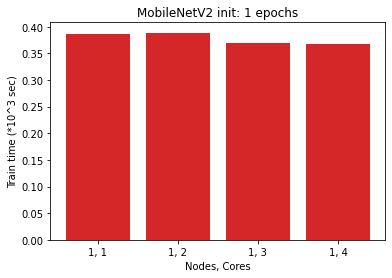

In [ ]:
visualize_grid_search(f"{name} init", init_epochs, results_init)

['1, 1', '1, 2', '1, 3', '1, 4'] [0.46413040113449094, 0.46529864525794984, 0.48959118032455445, 0.48401571226119994]
|------|----------|
| 1, 1 | 0.46413  |
| 1, 2 | 0.465299 |
| 1, 3 | 0.489591 |
| 1, 4 | 0.484016 |


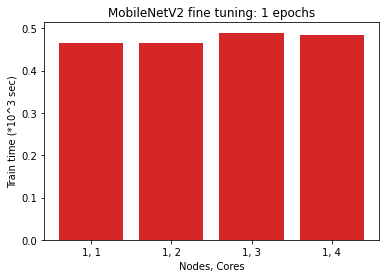

In [ ]:
visualize_grid_search(f"{name} fine tuning", fine_tuning_epochs, results_fine_tuning)

In [ ]:
tabulate_grid_search(f"{name} fine tuning", fine_tuning_epochs, results_fine_tuning)

MobileNetV2 fine tuning
| Nodes, Cores   |   fit_time (sec) |
|----------------|------------------|
| 1, 1           |          464.13  |
| 1, 2           |          465.299 |
| 1, 3           |          489.591 |
| 1, 4           |          484.016 |
